<a href="https://colab.research.google.com/github/varsantos/Data_science/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Titanic - Prevendo Sobrevivência
Neste notebook vou explorar o famoso dataseet Titanic para prever a sobrevivência dos passageiros usando variadas técnicas de Machine Learning como Logistic Regression, Decision Trees, Random Forest, K-Nearest Neighbors (KNN), Support Vector Machine (SVM) e Gradient Boosting. Passaremos por etapas de carregamento dos dados, limpeza dos dados, engenharia de recursos, treinamento de modelos e Avalição.

[Link para download Dataset](https://www.kaggle.com/competitions/titanic/data)


`Realizado por Vagner Santos`


**Passos Seguidos no Projeto:**
1. Carregamento dos dados
2. Limpeza e tratamento dos dados
3. Treinamento dos modelos
4. Avaliação de desempenho


# **1. Carregamento dos dados**

Vou fazer o ETL dos dados

In [2]:
#Carregando o dataset no Google Colab:

# Caso você esteja executando este notebook no Google Colab, podemos usar a função `files.upload()`
# para carregar arquivos diretamente do seu computador para o ambiente do Colab. Ao rodar a célula abaixo,
# um botão será exibido para que você possa selecionar o arquivo que deseja enviar.

from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
#importando bibliotecas e lendo o arquivo csv

import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')

**Dicionário dos dados**

- `PassengerId` - IDs de todos os passageiros
- `Survived` - Identificação se passageiro sobreviveu ou não (0 = No, 1 = Yes)
- `Pclass` - Classe que passageiro viajava (1 = First, 2 = Second, 3 = Third)
- `Name` - Nome do passageiro
- `Sex` - Genêro do passageiro
- `Age` - Idade do passageiro
- `SibSp` - Define as relações familiares (irmão, irmã, marido e esposa)
- `Parch` - Define a relação Familiar (pai, mãe, filho, filha)
- `Ticket` - número do bilhete de embarque
- `Cabin` -  Número da cabine
- `Embarked` - Porto de embarcação (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Já podemos analisar que o `PassengerId` está bem distribuido, e todos os passageiros tem um ID, também podemos analisar que a `média de idade` é de `29 anos` e a `mediana` é de `28 anos`, mas se olhar o `"Fare"` a `média` é de `32` e temos um valor máximo de `512` assim teremos que analisar posteriormente esses dados, mas parece que  existe uma distribuição dos dados próximo do normal

In [7]:
train.nunique()

#podemos perceber que realmente o passengerId é único para cada passageiro, e talvez possamos desconsidera-lo na análise.

,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


In [8]:
#verificando se temos valores nulos no dataset
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Podemos notar que temos 177 passageiros sem a idade informada, 687 sem número de cabine, e 2 sem o local de embarque.

# **2. Limpeza e tratamento dos dados**

Exploratory Data Analysis

Existe uma biblioteca de ciência de dados poderosa chamada `Ydata Profiling` ela é capaz de gerar um relatório completo e detalhado de EDA.



In [9]:
!pip install ydata-profiling
import ydata_profiling as yd

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=411c9adf25e1485d208708cab1925a4d4e535cea457c39a75d9e7ca39022a041
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [10]:
profile = yd.ProfileReport(train, title="Titanic EDA Report")
profile.to_file("titanic_EDA.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

click para acessar o report automático
[TITANIC EDA REPORT](https://drive.google.com/file/d/17mznY1_CFWUfnwPIp_D3P761-7W5vy7T/view?usp=sharing)

**Análise univariada**

A variável `Age` representa a idade dos passageiros. Para esta análise, vamos observar a distribuição etária dos passageiros a bordo.

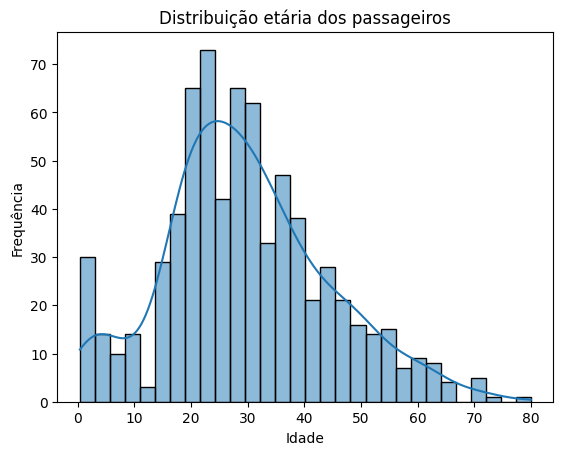

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title('Distribuição etária dos passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

Através do gráfico, vemos que há uma concentração de passageiros em certas faixas etárias. Além disso, será interessante ver se os passageiros mais jovens ou mais velhos têm maior probabilidade de sobreviver.

A váriavel `Survived` é o alvo do nosso modelo. Vamos visualizar a quantidade de passageiros que sobreviveram (1) e não sobreviveram (0).

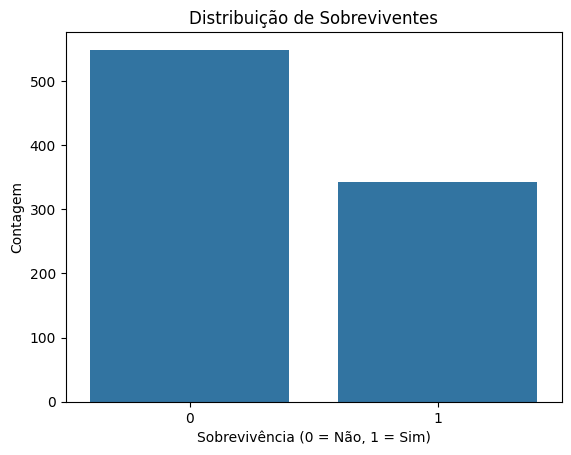

In [12]:
sns.countplot(x='Survived', data=train)
plt.title("Distribuição de Sobreviventes")
plt.xlabel('Sobrevivência (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

A váriavel `Sex` é fundamental para a análise, já que, históricamente, mulheres e crianças foram prioritárias no resgate. Vamos ver a distribuição

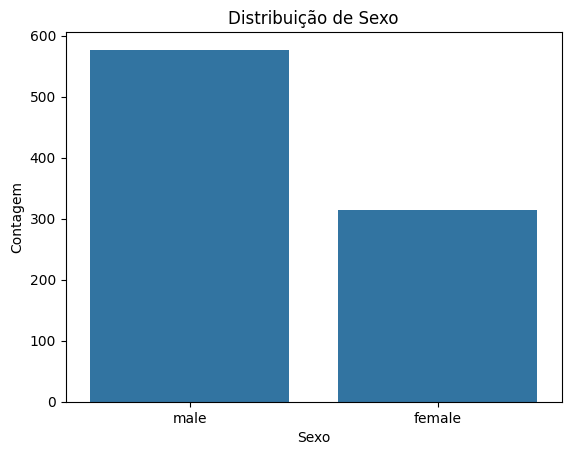

In [13]:
sns.countplot(x='Sex', data=train)
plt.title("Distribuição de Sexo")
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.show()

A váriavel `Pclass` representa a classe da viagem dos passageiros (1ª, 2ª e 3ª classe).

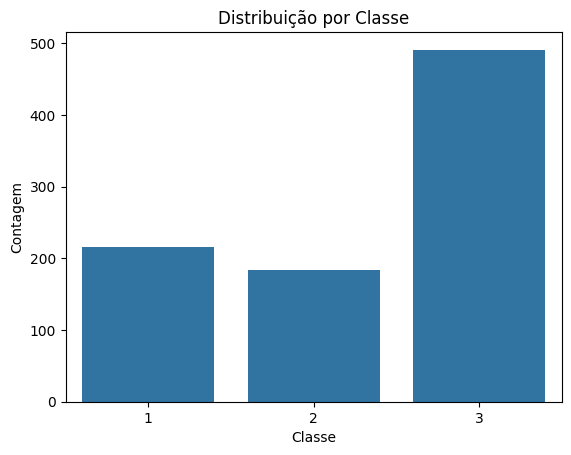

In [14]:
sns.countplot(x='Pclass', data=train)
plt.title('Distribuição por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

Aqui, vemos que temos uma grande concentração de passageiros na 3ª classe e faremos observações sobre a distribuição e possíveis relações com a taxa de sobrevência.


Com base na análise univariada, já conseguimos identificar algumas características importantes do dataset, como a distribuição de idade, gênero e classe. Essas variáveis podem ter um impacto significativo na probabilidade de sobrevivência, o que será explorado nas próximas etapas, como a análise bivariada e a modelagem preditiva.

**Análise bivariada**

Sobrevivência vs Gênero (`Survived` vs `Sex`)\
Vamos explorar como o gênero afetou a taxa de sobrevivência. Como mencionado antes, é esperado que haja uma diferença significativa entre homens e mulheres, devido à regra "mulheres e crianças primeiro" no resgate.

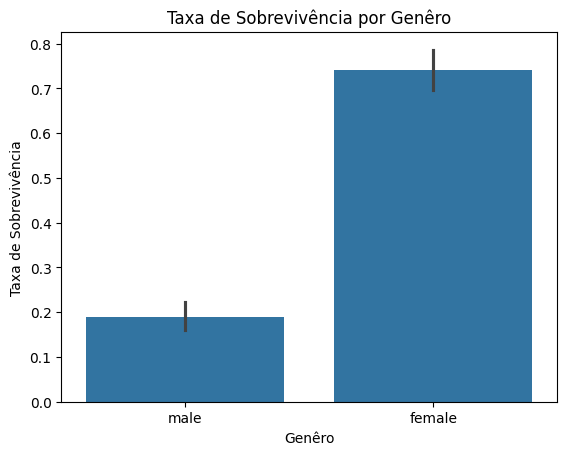

In [15]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Taxa de Sobrevivência por Genêro')
plt.xlabel('Genêro')
plt.ylabel('Taxa de Sobrevivência')
plt.show()

Como já esperado a taxa de sobrevivência entre mulheres é maior do que a dos homens.

Vamos investigar se a classe social teve impacto na sobrevivência dos passageiros. Passagens de 1ª classe eram mais caras, o que pode ter influenciado a probabilidade de resgate.

Sobrevivência vs Classe (`Survived` vs `Pclass`)\
Vamos investigar se a classe social teve impacto na sobrevivência dos passageiros. Passagens de 1ª classe eram mais caras, o que pode ter influenciado a probabilidade de resgate.

In [16]:
#agrupar os sobreviventes por classe usando o groupby e fazer uma contagem de vivos e mortos com coount(), e para desempilhar os dados usei o unstack()
sobreviventes_por_classe = train.groupby(['Pclass', 'Survived'])['PassengerId'].count().unstack()
sobreviventes_por_classe

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


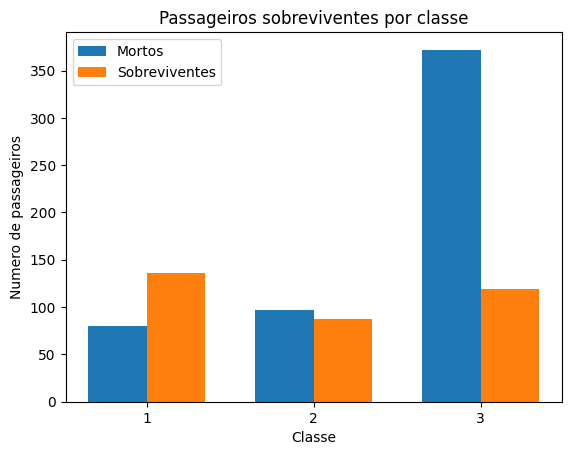

In [17]:
#definindo o tamanho do grafico e a lagura das barras
largura_barra = 0.35
posicoes = range(len(sobreviventes_por_classe.index))

plt.bar(posicoes, sobreviventes_por_classe[0], width=largura_barra, label='Mortos') #criando uma barra para os mortos
plt.bar([p + largura_barra for p in posicoes], sobreviventes_por_classe[1], largura_barra, label='Sobreviventes') #criando uma barra para os vivos

#rotulando a área do gráfico
plt.xlabel('Classe')
plt.ylabel('Numero de passageiros')
plt.title('Passageiros sobreviventes por classe')
plt.xticks([p + largura_barra / 2 for p in posicoes], sobreviventes_por_classe.index)
plt.legend()

plt.show()

Como podemos ver a porcentagem de pessoas que sobreviveram é maior entre a 1ª e 2ª classe, a 3ª mostra que ~80% dos passageiros faleceram no acidente.

Sobrevivência vs Idade (`Survived` vs `Age`)\
A idade pode ser outro fator relevante para a sobrevivência. Normalmente, crianças teriam prioridade durante o resgate.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


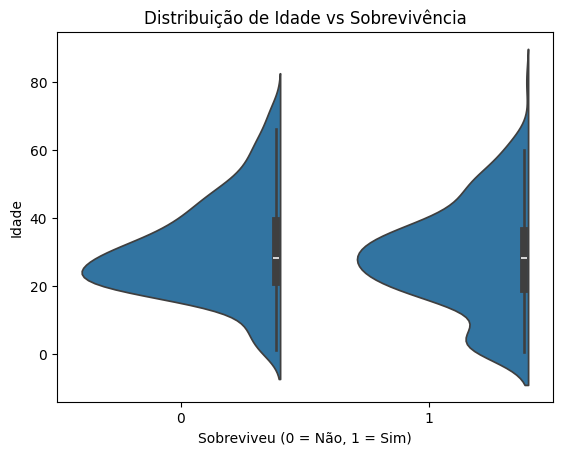

In [18]:
# Usando um gráfico de dispersão (scatter) para ver a relação entre idade e sobrevivência
sns.violinplot(x='Survived', y='Age', data=train, split=True)
plt.title('Distribuição de Idade vs Sobrevivência')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Idade')
plt.show()


Podemos ver que os jovens e crianças tiveram prioridade no resgate.

Vamos aprofundar a análise e verificar a porcetagem de chance de sobrevivência de cada classe.

In [19]:
#Chance de sobrevivência por classe
total_por_classe = sobreviventes_por_classe.sum(axis=1)
percentual_sobreviventes = sobreviventes_por_classe[1] / total_por_classe * 100
percentual_mortos = sobreviventes_por_classe[0] / total_por_classe * 100

In [20]:
#vamos concatenar essa conta ao dataset q criei pra analisar os dados de sobrevivência

porcentagens = pd.DataFrame({'Percentual Sobreviventes' : percentual_sobreviventes,'Percentual Mortos': percentual_mortos})
sobreviventes_por_classe = pd.concat([sobreviventes_por_classe, porcentagens], axis=1)
sobreviventes_por_classe

,0,1,Percentual Sobreviventes,Percentual Mortos
Pclass,,,,
1,80,136,62.962963,37.037037
2,97,87,47.282609,52.717391
3,372,119,24.236253,75.763747


A análise bivariada revela padrões e correlações importantes entre as variáveis e a sobrevivência dos passageiros. Esses padrões ajudarão a informar a construção dos modelos preditivos. Algumas descobertas importantes que podem surgir incluem:

* Gênero: As mulheres tiveram uma taxa de sobrevivência significativamente maior.
* Classe: Passageiros da 1ª classe tiveram mais chances de sobreviver.
* Idade: Jovens e crianças tendem a sobreviver mais que adultos.





**Análise Multivariada**

Aqui, o foco será observar como diferentes fatores, como gênero, classe e idade, interagem entre si e impactam a variável-alvo Survived. Com isso, conseguimos obter insights mais profundos do que simplesmente olhar as variáveis de forma isolada.

Sobrevivência vs Gênero vs Classe (`Survived` vs `Sex` vs `Pclass`)

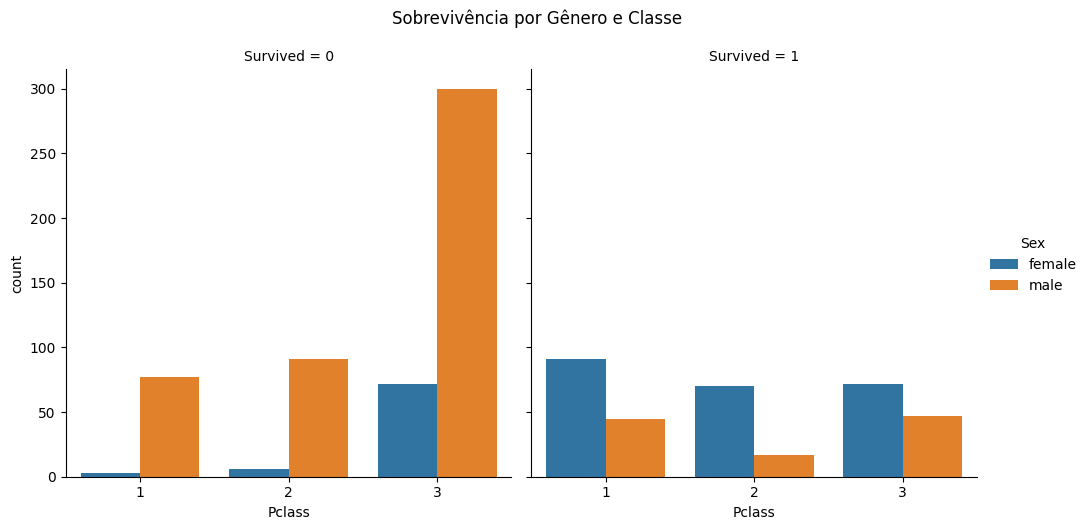

In [21]:
sns.catplot(x='Pclass', hue='Sex', col='Survived', kind='count', data=train)
plt.suptitle('Sobrevivência por Gênero e Classe', y=1.05)
plt.show()

Neste gráfico agora fica claro a quantidade de homens e que principalmente da 3° classe faleceram, e fica clato também que a Classe influenciou na sobrevivência.

Sobrevivência vs Gênero vs Idade (`Survived` vs `Sex` vs `Age`)\
Agora, vamos verificar como a idade interage com o gênero na probabilidade de sobrevivência. A expectativa é que mulheres jovens (crianças) tenham tido maior chance de sobrevivência.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

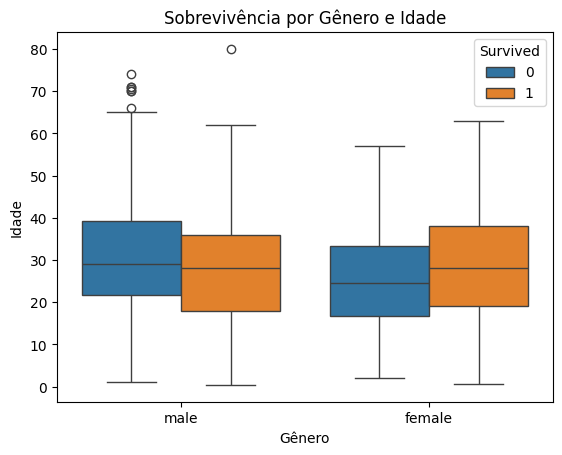

In [22]:
sns.boxplot(x='Sex', y='Age', hue='Survived', data=train)
plt.title('Sobrevivência por Gênero e Idade')
plt.xlabel('Gênero')
plt.ylabel('Idade')
plt.show()

In [23]:
#vamos verificar quem são os passageiros que não tem local de embarque

train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Buscando o nome das duas mulheres no [Encyclopedia titanica](https://www.encyclopedia-titanica.org/), conseguimos saber onde elas embarcaram que foi no Southampton

In [24]:
#substituindo os valores nulos de embarque

train['Embarked'].fillna('S', inplace=True)
#esta funçao vai filtrar tudo que está NaN e vai substituir por "S", respeitando o dicionário de dados informados no início

<ipython-input-24-c320bdc6a804>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna('S', inplace=True)



Como temos 177 pessoas sem idade, é inviável fazer a mesma coisa que realizamos anteriormente, então podemos usar de técnicas estatiscas para colocar a idade dessas pessoas

<Axes: ylabel='Frequency'>

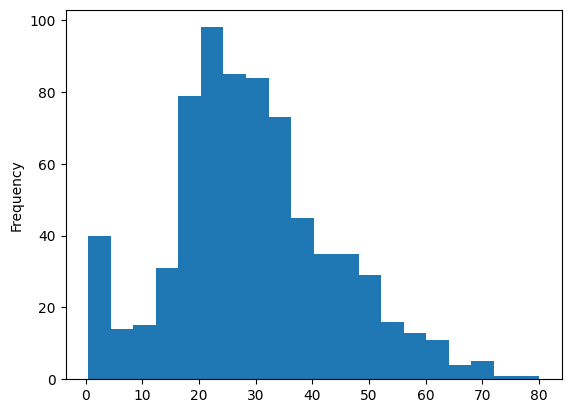

In [26]:
train.Age.plot.hist(bins=20)

Com o histograma temos uma clareza maior, podemos ver que temos bastante bebês, poucas crianças e temos um crescimento de jovens até os adultos.

Sabemos que a média é 29 anos e a mediana é de 28 anos. Será que temos diferença se abrimos isso por classe dos passajeiros e/ou por gênero?

In [27]:
#verificando a média de idade por classe do Titanic

train.groupby(['Pclass', 'Sex'])['Age'].median() #Essa função vamos agrupar por classes e por idade e achar a média

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

Vamos tratar os casos de `NaN` substituindo os valores pela mediana que calculamos acima.

In [28]:
train['Age'] = train.Age.fillna(train.groupby(['Pclass', 'Sex'])['Age'].transform('median'))
#Estamos filtrano a coluna 'Age', depois pegando os valores vazios de 'Age' usando a função FILLNA para preencher estes valores usamos a função Groupby e transform para fazer a mediana da idade de acordo com o Gênero e classe.

Agora ficou faltando apenas a coluna de cabines, mas eu acredito que não seja necessário, então eu vou retirar essa coluna do meu Dataset

In [29]:
#verificxando numeros novamente

train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [30]:
#analisando as cabines

train.Cabin.value_counts()

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


Podemos notar que as cabines não fazem muito sentido na análise e não é tão relevante, então eu vou retirar essa coluna da minha base.

In [31]:
train = train.drop(['Cabin'], axis=1)

In [33]:
#verificando se o data set não consta mais a coluna Cabine

train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
#verificando novamente
train.describe()

#podemos notar que na Tarifa (Fare) tem um valor muito fora 512.32, vamos verificar

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.112424,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.304424,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.500000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

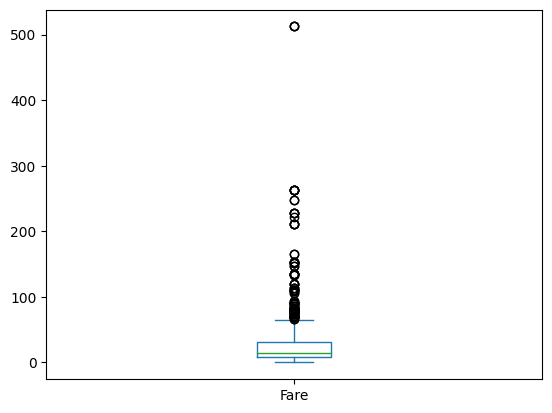

In [35]:
#outlier Fare

train.Fare.plot.box()

<Axes: ylabel='Frequency'>

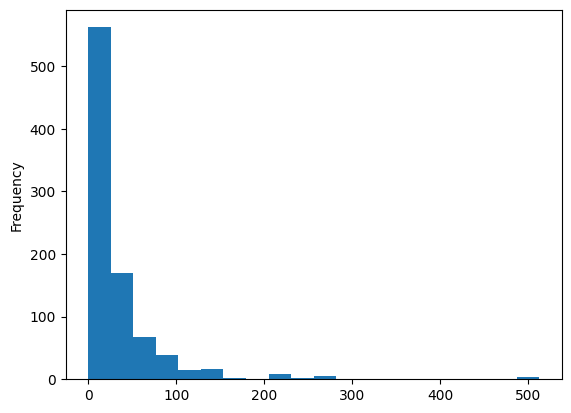

In [36]:
train.Fare.plot.hist(bins=20)

Podemos notas que os gráficos acima nos mostram que a maioria dos passageiros pagaram uma taxa inferior a `100,00`.

Mas temos esse outlier, vamos verificar o que são para identificamos o que podemos fazer

In [37]:
#filtrando o valor
train[train.Fare == train.Fare.max()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C



Consultei novamente os valores na [Encyclopedia titanica](https://www.encyclopedia-titanica.org/) e os valores estão corretos, e fazem sentido são passageiros de primeira classe e provavelmente ficaram nas melhores cabines disponíveis na época.

## **Base final**

Vamos analisar como ficou nosso banco de dados, como podemos ver acima a base ainda têm duas colunas que eu julgo que não vai nos ajudar na predição quem sobreviveu são elas:  `PassengerId`, `Ticket` e `Embarked`

Essas colunas tem valores únicos para cada passageiro e isso mostra que não será necessário usa-lá. Porém vou deixar apenas a `PessengerId` para poder posteriormente comparar o resultado disso com o dataset `Gender_submission`

In [38]:
#excluindo as coluna Ticket e Embarked
train = train.drop(columns=['Ticket', 'Embarked'])

In [39]:
#visualizando a base final

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500


Os modelos de machine learning não entendem variáveis do tipo `Object` vamos transformar os dos em números usando a função One-hot enconding

In [40]:
#codificando a coluna Sex
train = pd.get_dummies(train, columns=['Sex'], prefix='Sex')

no código acima, vamos transformar as variáveis `"male"` em `0` e `"famale"` em `1` e colocas em colunas separadas para a gente entender melhor a relação dos gênero com a sobrevivência.

In [41]:
#Verificando os nomes
train['Title'] = train['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Visualizando os títulos únicos
print(train['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


No código acima utilizamos a função `apply(lambda x:` que acessa cada variável da coluna `'Name'` que é representado por `x`.

Depois aplicamos as funções `.split` para separar os titulos dos nomes como `"Braund, Mr. Owen Harris"` conseguimos deixar apenas o `"Mr."`







In [42]:
#convertendo os títulos em categorias mais gerais
train['Title'] = train['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [43]:
#usando One-Hot Enconding para Title
train = pd.get_dummies(train, columns=['Title'], drop_first=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,False,False,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,True,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,False,False,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,True,False,True,False,False


In [45]:
train = train.drop(['Name'], axis=1)

train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,True,False,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,True,False,True,False,False,False
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,False,True,False,True,False,False


Uma outra análise que podemos fazer agora é a `Matrix de Correlação`

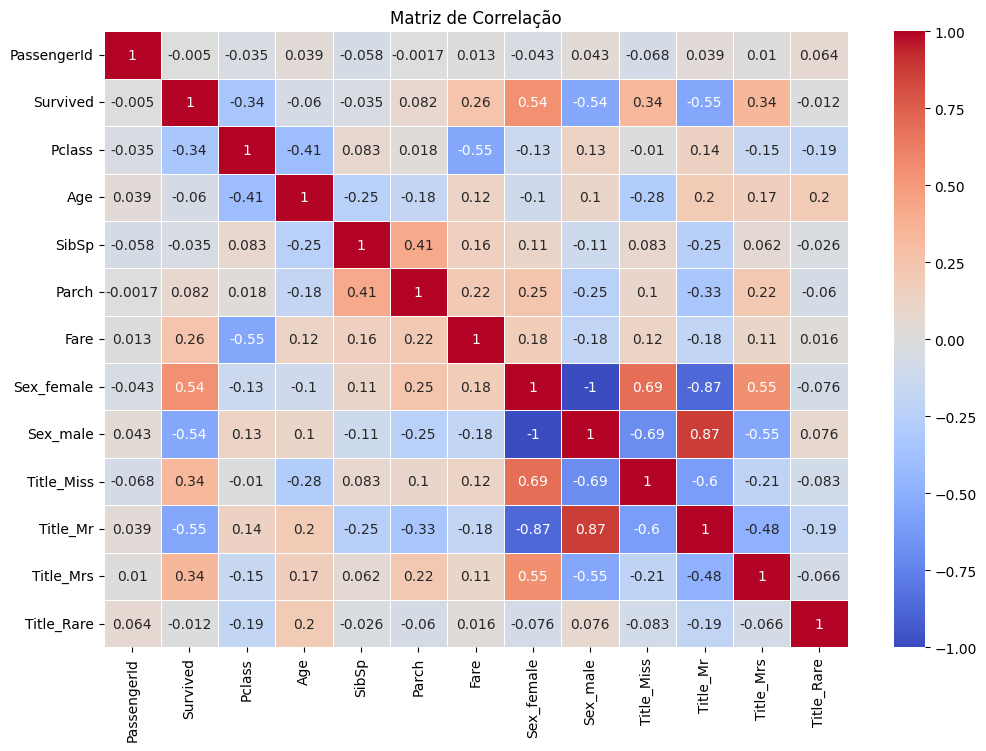

In [46]:
matriz_corr = train.corr()

plt.figure(figsize=(12,8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Aplicamos todas esses tratamentos de dados para a Tabela de Train, porém esse arquivo do Titanic conta com 3 arquivos

*   Train.csv
*   Test.csv
*   Gender_submission.csv - *esse terceiro dataset é o banco de dados onde temos o PessengerId e o Survived.*

Agora precisamos aplicar todo o tratamento de dados também para a base de Test.csv.

Mas será que temos os mesmos campos nulos no Test.csv?







In [47]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Através do `info()` podemos já notar que temos uma coluna diferente é a `"Fare"`, ela está com 1 dado faltante. Do restante temos `"Age"` e `"Cabin"` com dados faltantes igual no dataset `Train.csv`

Vamos confirmar esses valores Nulos e tratá-los

In [48]:
#verificar a Cardinalidade dos daddos
test.nunique()

,0
PassengerId,418
Pclass,3
Name,418
Sex,2
Age,79
SibSp,7
Parch,8
Ticket,363
Fare,169
Cabin,76


In [49]:
test.isnull().sum().sort_values(ascending=False).head()
#ISNUL para filtrar apenas valores nulos
#SUM para contar quantos valores nulos temos
#SORT_VALUES para ordenar as variaveis que mais tem nulos de cima para baixo

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0


In [50]:
#Como temos o mesmo campo de idade com nulos igual a Train, podemos fazer o mesmo tratamento da base Train

test['Age'] = test.Age.fillna(test.groupby(['Pclass', 'Sex'])['Age'].transform('median'))

Agora que tratamos a idade com os mesmos parâmetros da `"train.csv"`, podemos olhar esse valor único do `"Fare"`, Vamos buscar no [Encyclopedia titanica](https://www.encyclopedia-titanica.org/) e vamos verificar o valor da Taxa que esse passageiro pagou


In [51]:
#verificando quem é o passageiro
test[test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


após analisar o dado de Fare, vamos tratar o dado faltante, pois como é apenas uma única informação podemos inseri-la manualmente sem problemas.

In [52]:
test['Fare'] = test.Fare.fillna('7')

atribuindo o valor 7 na Taxa de passgeiro, o valor 7 é o que encontramos na enciclopedia titanica.


In [53]:
#confirmando a alteração de valor

test[test['PassengerId'] == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,7,NaN,S


In [54]:
#excluindo as colunas Ticket, Cabin e Embarked também da tabela Teste
test = test.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)

Vamos aplicar a técnica de `One-Hot Encoding` na tabela de `test.csv`

In [55]:
#codificando a coluna Sex
test = pd.get_dummies(test, columns=['Sex'], prefix='Sex')

#separando os títulos
test['Title'] = test['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

#convertendo os títulos em categorias mais gerais
test['Title'] = test['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

#codificando Title
test = pd.get_dummies(test, columns=['Title'], drop_first=True)


In [56]:
#drop da coluna Name
test = test.drop(['Name'], axis=1)

In [57]:
#verificando o data set de Test

test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,0,0,7.8292,False,True,False,True,False,False
1,893,3,47.0,1,0,7.0,True,False,False,False,True,False
2,894,2,62.0,0,0,9.6875,False,True,False,True,False,False
3,895,3,27.0,0,0,8.6625,False,True,False,True,False,False
4,896,3,22.0,1,1,12.2875,True,False,False,False,True,False


In [58]:
#verificando se as duas tabelas estão iguais
train.columns.equals(test.columns)

False

Aqui vai dar `False`, pois o dataset de treino tem a coluna `"SurviveId"` e a teste não tem, justamente para a gente poder treinar o modelo para então testa-lo sem essa coluna target.

E Assim teremos as bases  finais para iniciar um modelo de Machine Learning

In [59]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,22.0,1,0,7.2500,False,True,False,True,False,False
1,2,1,1,38.0,1,0,71.2833,True,False,False,False,True,False
2,3,1,3,26.0,0,0,7.9250,True,False,True,False,False,False
3,4,1,1,35.0,1,0,53.1000,True,False,False,False,True,False
4,5,0,3,35.0,0,0,8.0500,False,True,False,True,False,False


In [60]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,892,3,34.5,0,0,7.8292,False,True,False,True,False,False
1,893,3,47.0,1,0,7.0,True,False,False,False,True,False
2,894,2,62.0,0,0,9.6875,False,True,False,True,False,False
3,895,3,27.0,0,0,8.6625,False,True,False,True,False,False
4,896,3,22.0,1,1,12.2875,True,False,False,False,True,False


**Modelos preditivos**

Durante meu curso na coderhouse me foi apresentando varios modelos durante o curso, e agora eu vou aplica-los para entender qual prevê o melhor resultado e assim fazer uma melhor decisão.

Modelos que serão testados:



*   Logistic Regression
*   K-Nearest Neighbors (KNN)
*   Decision Trees
*   Random Forest
*   Support Vector Machine (SVM)
*   Gradient Boosting

Esses são os modelos mais populares para algoritmos supervisionados de Machine learning usados em tarefa de classificação, onde o objetivo é prever se o passageiro sobreviveu ou não(variável binária)


In [61]:
#Separando o modelo para treino e teste dos modelos

from sklearn.model_selection import train_test_split

X = train.drop('Survived', axis = 1)
y = train['Survived']

# separando a base em 30% para teste e instanciando 42 para quem rodar obter o mesmo resultado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [62]:
#importando modelos

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

**Logistic Regression**

Este modelo é usado para prever uma probabilidade de uma variavél de saída binária, ela usa a função sigmoide que prevê um resultado entre `0` e `1`.




In [63]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**K-Nearest Neighbors (KNN)**

Este modelo é usado para classificar um novo dado comparando com o dado de treinamento, ele busca os `k` vizinhos mais próximos (em termos de distância) no espaço das features e classifica o dado com base no mais comum entre os vizinhos.





In [64]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

**Decision Tree**

Este modelo divide os dados em subsets baseados em regras condicionais, cada nó da árvore representa uma condição da decisão , e as folhas representam as classificações finais.

Temos que só tomar cuidado para não dar Overfitting, que é ajustar demais os dados, se a arvore for muito profunda

In [65]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree =  decision_tree.predict(X_test)
accuracy_decision_tree =  accuracy_score(y_test, y_pred_decision_tree)

**Random Forest**

Este modelo é um ensemble de muitas arvóres de decisão, ele treina várias árvores em subconjutos diferentes de dados e combina suas previsões, usando a maioria dos resultados para a classificação. Ele é mais potente que o Decision Tree e muito bom contra Overfitting

In [66]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

**Support Vector Machine (SVM)**

Este modelo busca encontrar um hiperplano que melhor separa as classes no espaço de features. Ele maximiza a margem entre as classes e os dados  mais próximos do vetores de suporte.

In [67]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_train)
accuracy_svm = accuracy_score(y_train, y_pred_svm)

**Gradient Boosting**

Este modelo é muito parecido com o Random Forest, pois ele usa o mesmo método de ensemble, mas as árvores são treinadas em sequencia, e cada nova árvore tenta corrigir os erros da árvore anterior, assim otimizando a função de perda.

Mas ela é muito sucetível a overfitting se não for bem regulada.

In [68]:
gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred_gradient_boosting = gradient_boosting.predict(X_train)
accuracy_gradient_boosting = accuracy_score(y_train, y_pred_gradient_boosting)